EXPLORING:

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [103]:
df=pd.read_csv('nearest-earth-objects(1910-2024).csv')
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [104]:
df.shape

(338199, 9)

In [105]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
neo_id,2162117,2349507,2455415,3132126,3557844,3656926,3421513,3541504,3836942,3892166
name,162117 (1998 SD15),349507 (2008 QY),455415 (2003 GA),(2002 PB),(2011 DW),(2014 BT8),(2008 OX1),(2010 OF101),(2018 YH),(2019 UP13)
absolute_magnitude,19.14,18.5,21.45,20.63,22.7,25.0,21.5,19.75,21.7,23.45
estimated_diameter_min,0.394962,0.530341,0.136319,0.198863,0.076658,0.02658,0.133216,0.298233,0.121494,0.054269
estimated_diameter_max,0.883161,1.185878,0.304818,0.444672,0.171412,0.059435,0.297879,0.666868,0.271669,0.12135
orbiting_body,Earth,Earth,Earth,Earth,Earth,Earth,Earth,Earth,Earth,Earth
relative_velocity,71745.401048,109949.757148,24865.506798,78890.076805,56036.519484,47477.649832,57853.295346,46972.486794,37424.548382,38524.867869
miss_distance,58143623.31917,55801047.818199,67206887.722545,30396444.123282,63118626.507265,42905214.175839,27279081.267306,69975931.31115,5657726.906879,61661184.562653
is_hazardous,False,True,False,False,False,False,True,False,True,False


CLEANING & EDA:

In [106]:
df.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [108]:
df.duplicated().sum()

0

In [109]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [110]:
df['estimated_diameter_min'].fillna(value=df['estimated_diameter_min'].mean(),inplace=True)
df['estimated_diameter_max'].fillna(value=df['estimated_diameter_max'].mean(),inplace=True)
df['absolute_magnitude'].fillna(value=df['absolute_magnitude'].mean(),inplace=True)

In [111]:
df.isna().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [112]:
df.drop(['neo_id','name','orbiting_body'], axis=1, inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338199 non-null  float64
 1   estimated_diameter_min  338199 non-null  float64
 2   estimated_diameter_max  338199 non-null  float64
 3   relative_velocity       338199 non-null  float64
 4   miss_distance           338199 non-null  float64
 5   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 13.2 MB


In [114]:
df.corr(numeric_only=True)

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
absolute_magnitude,1.000000,-0.594646,-0.594646,-0.345564,-0.213516,-0.343994
estimated_diameter_min,-0.594646,1.000000,1.000000,0.222430,0.111471,0.164840
estimated_diameter_max,-0.594646,1.000000,1.000000,0.222430,0.111471,0.164840
relative_velocity,-0.345564,0.222430,0.222430,1.000000,0.322587,0.187021
miss_distance,-0.213516,0.111471,0.111471,0.322587,1.000000,-0.006540
is_hazardous,-0.343994,0.164840,0.164840,0.187021,-0.006540,1.000000


<Axes: >

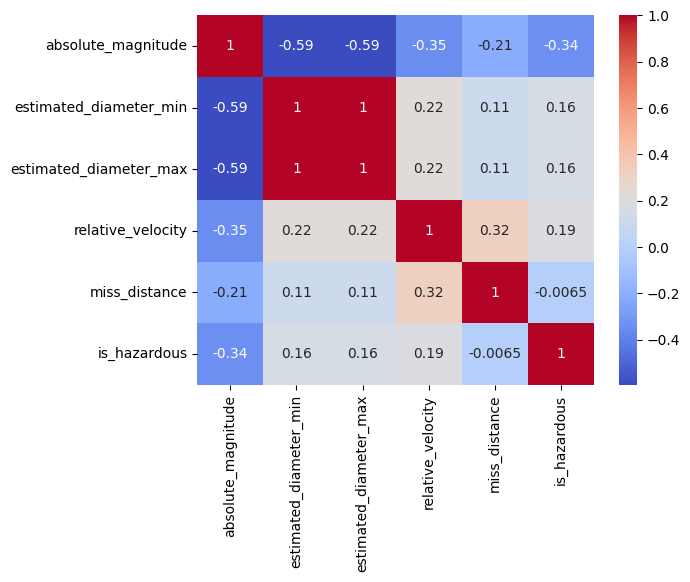

In [115]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: title={'center': 'Count Of is_hazardous'}, ylabel='count'>

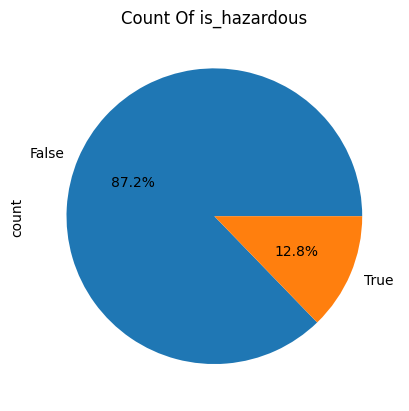

In [116]:
df['is_hazardous'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='Count Of is_hazardous')

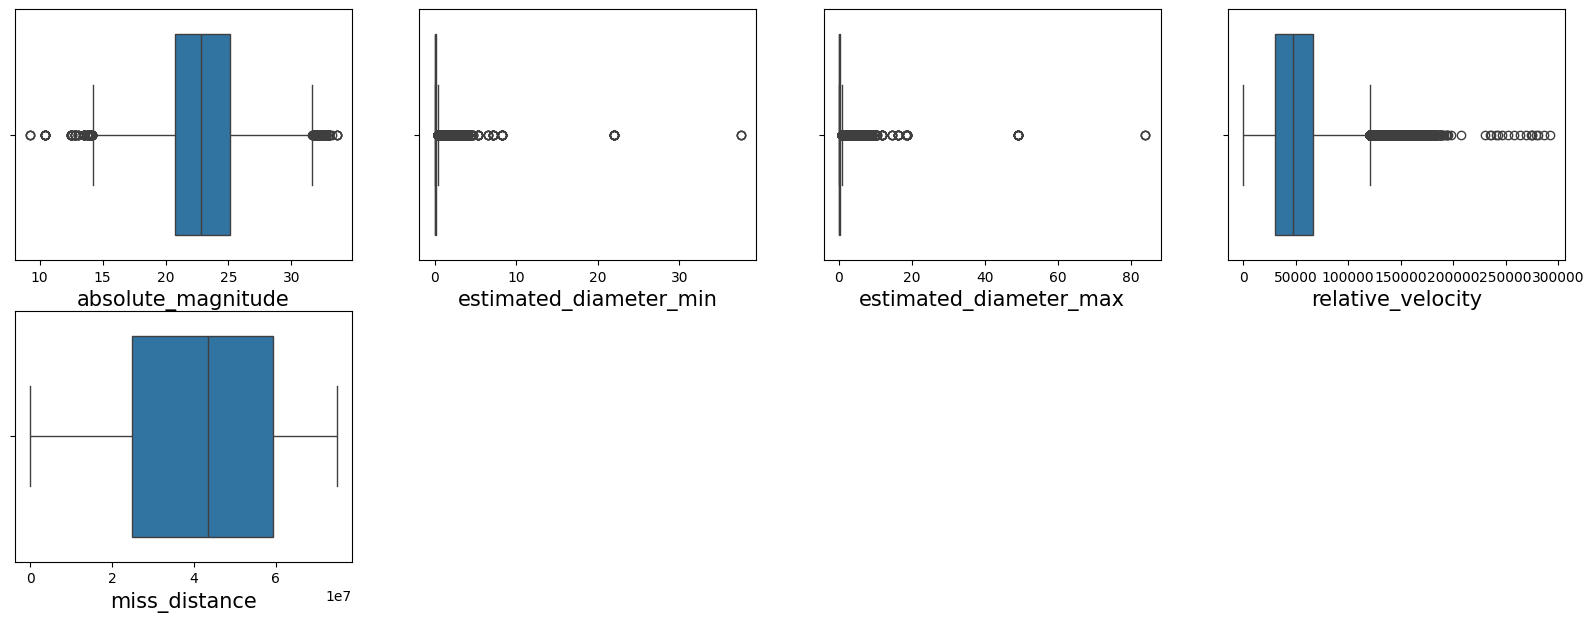

In [117]:
#detect outliers from each column
column=['absolute_magnitude','estimated_diameter_min','estimated_diameter_max','relative_velocity','miss_distance']
plt.figure(figsize=(20,15))
for i,col in enumerate(column):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

In [118]:
# handling outliers
def handle_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
  return df

In [119]:
for col in column:
  df = handle_outliers(df, col)

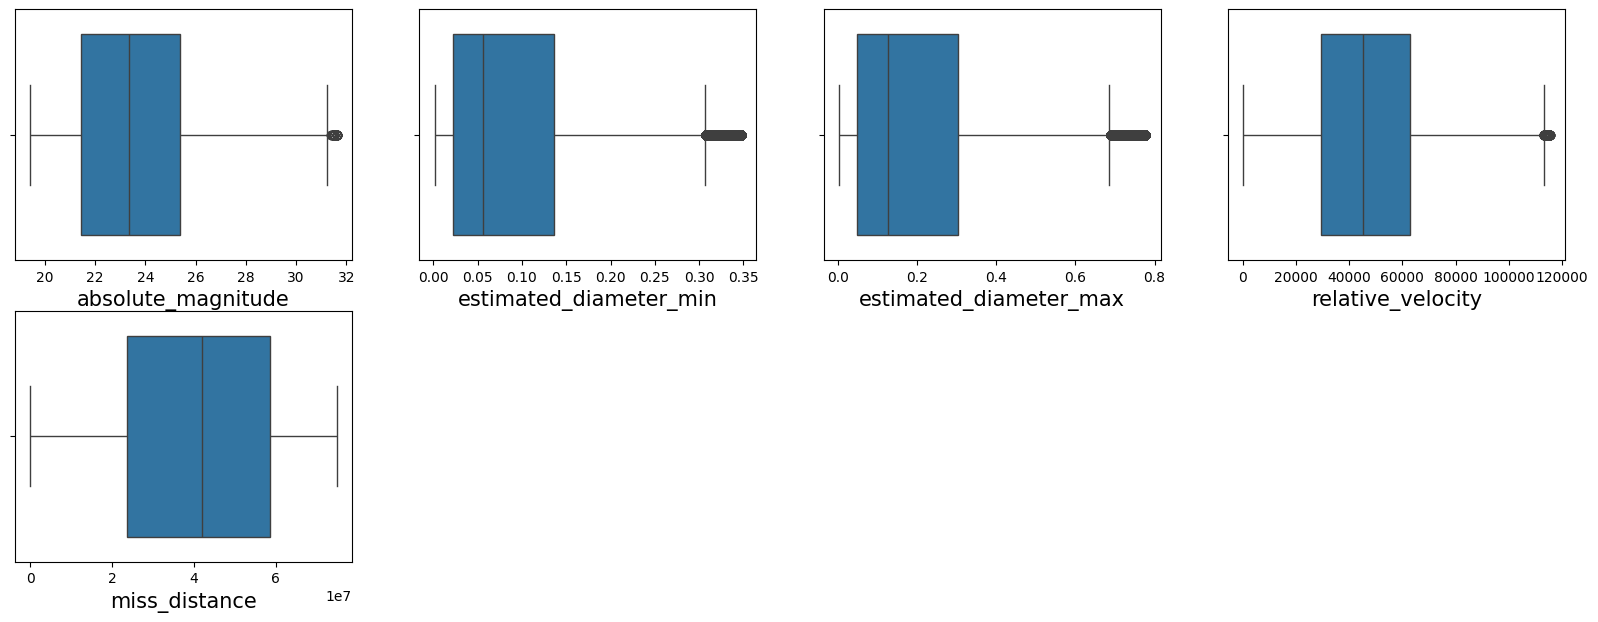

In [120]:
# make sure it's handled
plt.figure(figsize=(20,15))
for i,col in enumerate(column):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

PREPROCESSING & MODELING :

In [121]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [122]:
from imblearn.over_sampling import SMOTE
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [123]:
sm = SMOTE(random_state=40)

x, y = sm.fit_resample(x, y)

y.value_counts()

is_hazardous
False    263607
True     263607
Name: count, dtype: int64

<Axes: title={'center': 'Count Of is_hazardous'}, ylabel='count'>

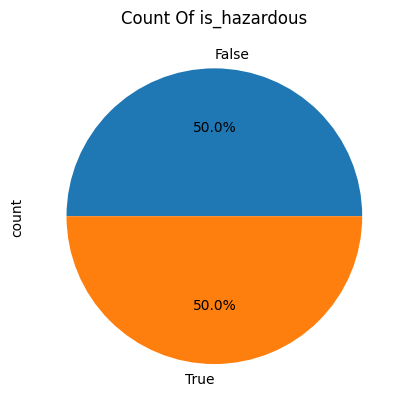

In [124]:
y.value_counts().plot(kind='pie',autopct='%1.1f%%',title='Count Of is_hazardous')

1. DECISION TREE

In [125]:
#train DT model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import preprocessing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
tree_model=DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [126]:
y_pred=tree_model.predict(x_test)

In [127]:
accuracy=accuracy_score(y_test,y_pred)
conf_mat=confusion_matrix(y_test,y_pred)
classification_repo=classification_report(y_test,y_pred)
print('Accuracy: {}'.format(accuracy))
print('confusion matrix: \n{}'.format(conf_mat))
print('classification Report: \n{}'.format(classification_repo))

Accuracy: 0.9467769316123403
confusion matrix: 
[[49864  2856]
 [ 2756 49967]]
classification Report: 
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     52720
        True       0.95      0.95      0.95     52723

    accuracy                           0.95    105443
   macro avg       0.95      0.95      0.95    105443
weighted avg       0.95      0.95      0.95    105443



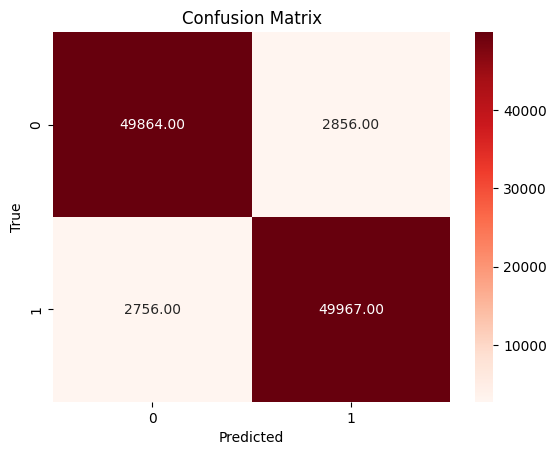

In [128]:
#confusion matrix for decision tree
conmat = confusion_matrix(y_test, y_pred)
sns.heatmap(conmat, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [129]:
#feature selection for decision tree
from sklearn.feature_selection import SelectFromModel
select=SelectFromModel(tree_model)
select.fit(x_train,y_train)
selected_features=x_train.columns[select.get_support()]
print('Num of selected features: {}'.format(len(selected_features)))
print('selected features:',selected_features)

Num of selected features: 1
selected features: Index(['estimated_diameter_min'], dtype='object')


2. RANDOM FOREST  

In [130]:
#train RF model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import preprocessing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [131]:
y_pred = rf_model.predict(x_test)

In [132]:
accuracy=accuracy_score(y_test,y_pred)
conf_mat=confusion_matrix(y_test,y_pred)
classification_repo=classification_report(y_test,y_pred)
print('Accuracy: {}'.format(accuracy))
print('confusion matrix: \n{}'.format(conf_mat))
print('classification Report: \n{}'.format(classification_repo))

Accuracy: 0.9570573674876474
confusion matrix: 
[[50566  2108]
 [ 2420 50349]]
classification Report: 
              precision    recall  f1-score   support

       False       0.95      0.96      0.96     52674
        True       0.96      0.95      0.96     52769

    accuracy                           0.96    105443
   macro avg       0.96      0.96      0.96    105443
weighted avg       0.96      0.96      0.96    105443



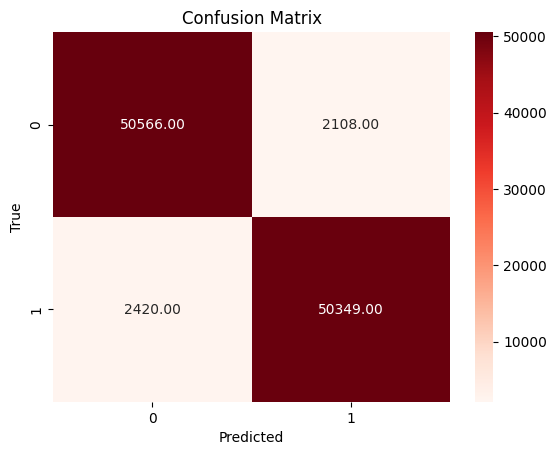

In [133]:
# confusion matrix for random forest
conmat = confusion_matrix(y_test, y_pred)
sns.heatmap(conmat, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [134]:
# feature selection for random forest
select=SelectFromModel(rf_model)
select.fit(x_train,y_train)
selected_features=x_train.columns[select.get_support()]
print('Num of selected features: {}'.format(len(selected_features)))
print('selected features:',selected_features)

Num of selected features: 3
selected features: Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max'],
      dtype='object')
